<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/Graphing_opinion_polls_git.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np


In [5]:
import pathlib
from datetime import date

date_work=str(date.today())

new_dir = pathlib.Path('/content/drive/MyDrive/RUSSdata/images/', date_work)
new_dir.mkdir(parents=True, exist_ok=True)


In [6]:
president_approval= pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Putin’s approval rating.csv')

In [7]:
president_approval.tail()

,date,Approve,Disapprove,No answer
285,2023-07-01,82.0,15.0,3.0
286,2023-08-01,80.0,16.0,4.0
287,2023-09-01,80.0,17.0,3.0
288,2023-10-01,82.0,15.0,3.0
289,2023-11-01,85.0,13.0,2.0


In [8]:
president_approval['date'] = pd.to_datetime(president_approval['date'].str.strip(), format='%Y-%m')+ pd.offsets.MonthEnd()

In [9]:
goverment_approval = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Approval of the government.csv')
goverment_approval['date'] = pd.to_datetime(goverment_approval['date'].str.strip(), format='%Y-%m')+ pd.offsets.MonthEnd()

In [10]:
#Approval ratings Max Min, 'Apprvove only'

mini_max = president_approval[(president_approval['Approve']==president_approval['Approve'].max()) |
                              ( president_approval['Approve']==president_approval['Approve'].min())]
mini_max_approve = mini_max[['date','Approve']]

print('Min and Max approval values for the Russian Federation Presidency')
print(mini_max_approve.to_string(index=False))

Min and Max approval values for the Russian Federation Presidency
      date  Approve
1999-08-31     31.0
2015-06-30     89.0


In [11]:
putin_only = president_approval[president_approval['date']>'2000']
print('Min and Max approval values for Mr. Putin')
mini_max_putin =putin_only[(putin_only['Approve']==putin_only['Approve'].max()) |
                              ( putin_only['Approve']==putin_only['Approve'].min())]
mini_max_putin_approve = mini_max_putin [['date','Approve']]
print(mini_max_putin_approve.to_string(index=False))

Min and Max approval values for Mr. Putin
      date  Approve
2015-06-30     89.0
2020-04-30     59.0
2020-05-31     59.0


2020 amendments to the Constitution of Russia were approved on 1 July: One of the changes effectively allows the sitting Presidet to run again for office. (source: https://en.wikipedia.org/wiki/2020_amendments_to_the_Constitution_of_Russia)

In [12]:
key_dates = mini_max_putin_approve.date.to_list()[:-1]


In [13]:
mini_max_putin_approve.date.to_list()[:-1]

[Timestamp('2015-06-30 00:00:00'), Timestamp('2020-04-30 00:00:00')]

In [14]:
d1 = pd.Timestamp('2022-1')
d2= pd.Timestamp('2000-5')

In [15]:
key_dates.insert(0, d2)
key_dates.insert(4, d1)

In [16]:
key_dates

[Timestamp('2000-05-01 00:00:00'),
 Timestamp('2015-06-30 00:00:00'),
 Timestamp('2020-04-30 00:00:00'),
 Timestamp('2022-01-01 00:00:00')]

In [17]:
text = [' Putin\nFirst term',' Putin\n max', ' Putin\n min', '2022']

In [18]:
means_p = (president_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()
means_g =(goverment_approval.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()


In [19]:
goverment_approval.tail()

,date,Approve,Disapprove,No answer
272,2023-07-31,67.0,27.0,6.0
273,2023-08-31,66.0,28.0,7.0
274,2023-09-30,67.0,28.0,5.0
275,2023-10-31,67.0,27.0,6.0
276,2023-11-30,69.0,27.0,4.0


In [20]:
# take from 2018–present: Fourth presidential term
pres_appr_2018 = president_approval[president_approval['date']>'2018']
gov_appr_2018 = goverment_approval[goverment_approval['date']>'2018']

Text(0.5, 0.98, 'Presidency\xa0:\xa0approval\xa0ratings')

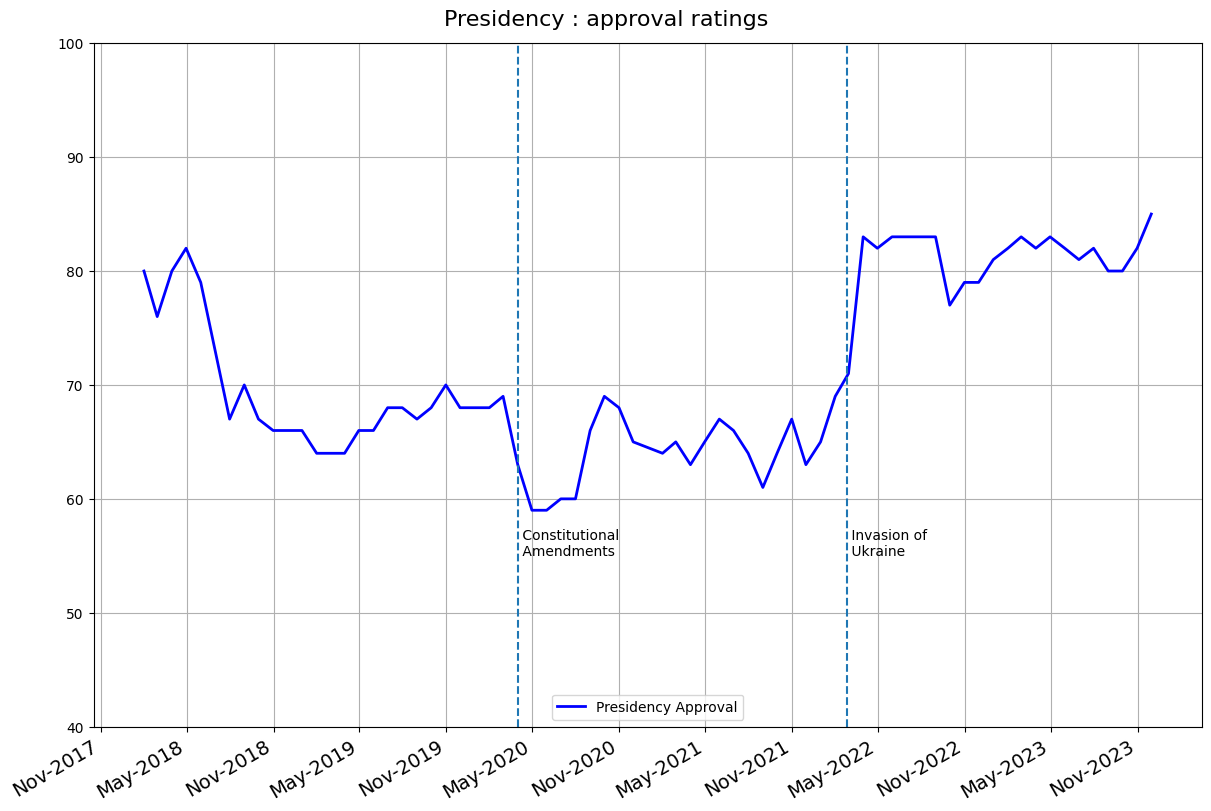

In [21]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True,)


plt.ylim(40,100)

ax.plot(pres_appr_2018.date,pres_appr_2018['Approve'], linewidth=2,color='blue' )

ax.axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2020-04-01'),y=55, s=' Constitutional\n Amendments', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2022-02-24'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2022-02-24'),y=55, s=' Invasion of\n Ukraine', horizontalalignment='left', color='black')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", size=14)
plt.grid()

ax.legend(['Presidency Approval'], loc='lower center')

fig.suptitle('Presidency : approval ratings', fontsize=16)

#plt.savefig(str(new_dir)+ '/pres_approval_monthly_yearly.jpg', bbox_inches='tight')

Text(0.5, 0.98, 'Government Approval\xa0:\xa0approval\xa0ratings')

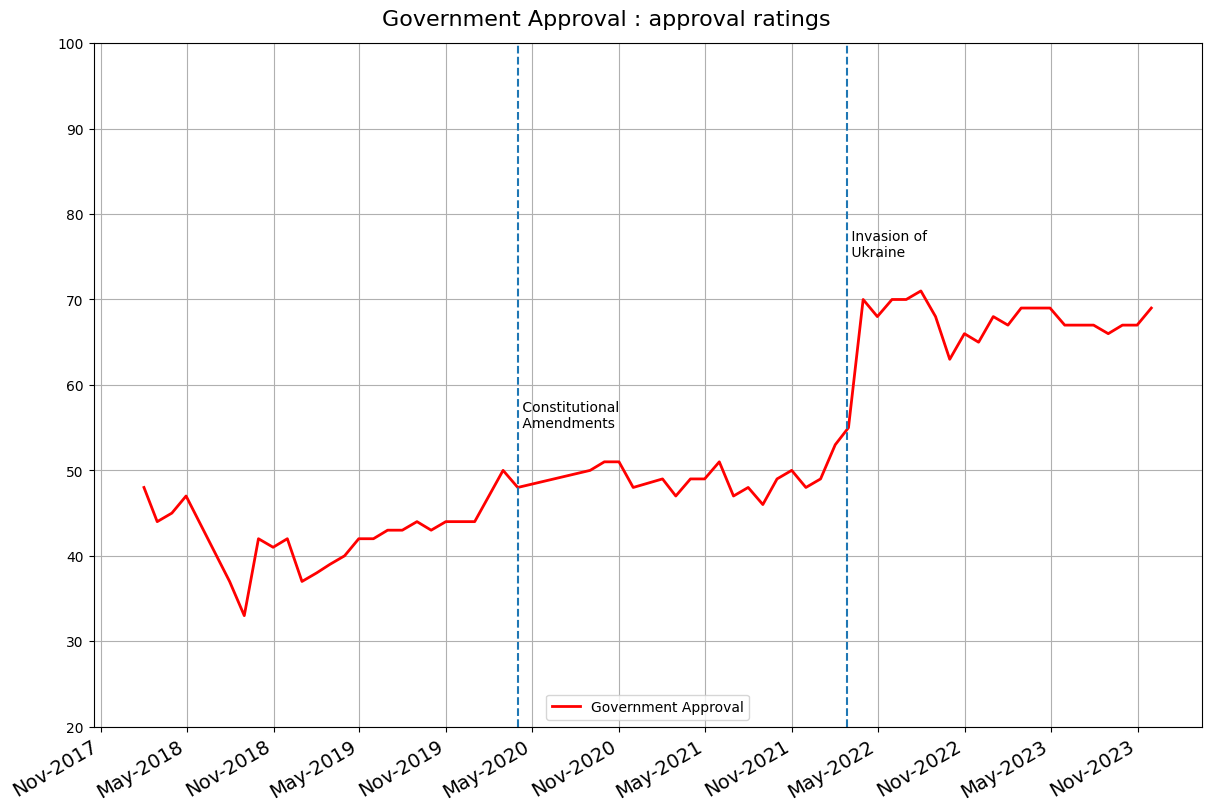

In [22]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True,)


plt.ylim(20,100)

ax.plot(gov_appr_2018.date,gov_appr_2018['Approve'], linewidth=2,color='red' )

ax.axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2020-04-01'),y=55, s=' Constitutional\n Amendments', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2022-02-24'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2022-02-24'),y=75, s=' Invasion of\n Ukraine', horizontalalignment='left', color='black')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", size=14)
plt.grid()

ax.legend(['Government Approval'], loc='lower center')

fig.suptitle('Government Approval : approval ratings', fontsize=16)

#plt.savefig(str(new_dir)+ '/gov_approval_monthly_yearly.jpg', bbox_inches='tight')

In [23]:
import pandas as pd
moving= pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Assessment of situation in the country.csv')
moving['date'] = pd.to_datetime(moving['date'].str.strip(), format='%Y-%m')+ pd.offsets.MonthEnd()

In [24]:
moving_fr_2018=moving[moving['date']>'2018']

In [25]:
moving_fr_2018.tail()

,date,In the right direction,On the wrong track,Difficult to answer
316,2023-07-31,66.0,23.0,12.0
317,2023-08-31,62.0,24.0,13.0
318,2023-09-30,62.0,26.0,12.0
319,2023-10-31,64.0,21.0,15.0
320,2023-11-30,67.0,21.0,12.0


Text(0.5, 0.98, 'Assessment of the situation in the country: Russia is moving in the right direction.')

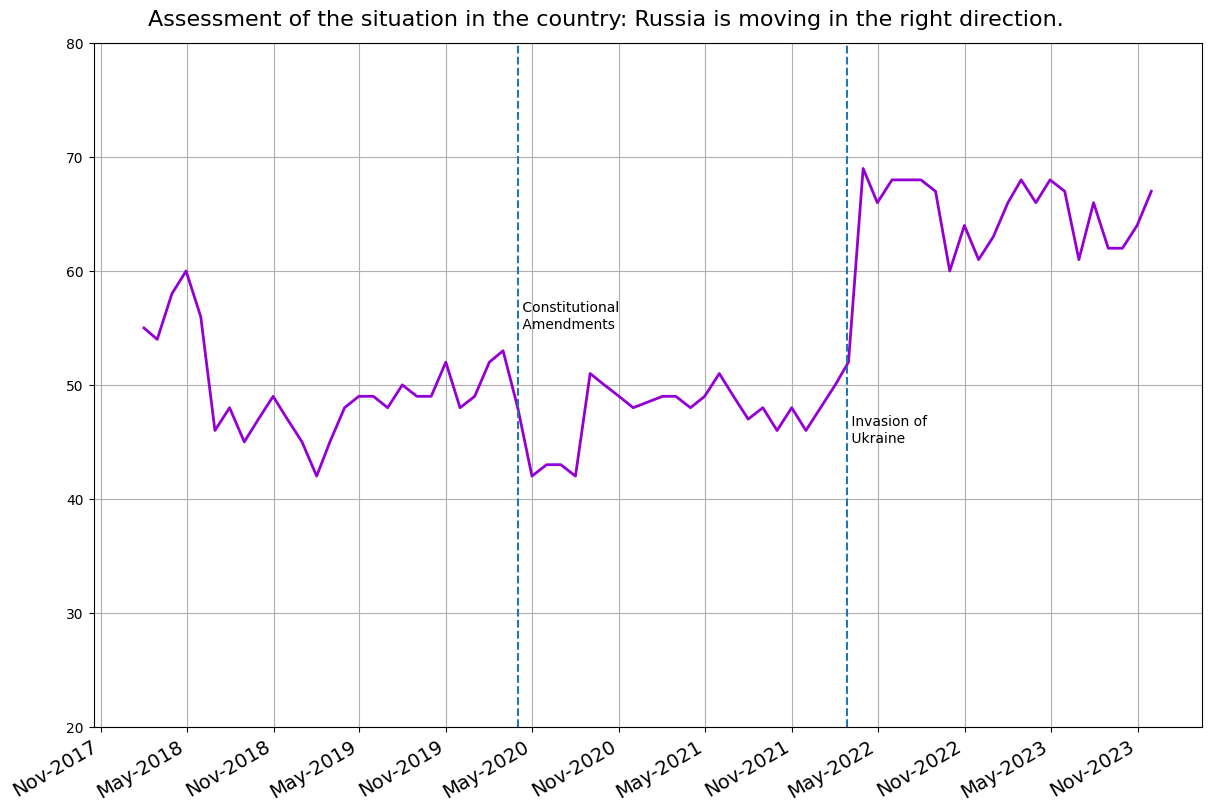

In [26]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True,)


plt.ylim(20,80)

ax.plot(moving_fr_2018.date,moving_fr_2018['In the right direction'], linewidth=2,color='darkviolet' )
# ax.plot(moving_fr_2018.date,moving_fr_2018['On the wrong track'], linewidth=4, linestyle = 'dashed', color='orange' )

ax.axvline(pd.Timestamp('2020-04-01'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2020-04-01'),y=55, s=' Constitutional\n Amendments', horizontalalignment='left', color='black')

ax.axvline(pd.Timestamp('2022-02-24'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2022-02-24'),y=45, s=' Invasion of\n Ukraine', horizontalalignment='left', color='black')

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", size=14)
plt.grid()

# ax.legend(['Presidency Approval'], loc='lower center')

fig.suptitle('Assessment of the situation in the country: Russia is moving in the right direction.', fontsize=16)


#plt.savefig(str(new_dir)+ '/moving.jpg', bbox_inches='tight')

In [27]:
means_moving = (moving.groupby(pd.Grouper(key='date', axis=0, freq='Y')).median()).reset_index()


In [28]:
moving.tail()

,date,In the right direction,On the wrong track,Difficult to answer
316,2023-07-31,66.0,23.0,12.0
317,2023-08-31,62.0,24.0,13.0
318,2023-09-30,62.0,26.0,12.0
319,2023-10-31,64.0,21.0,15.0
320,2023-11-30,67.0,21.0,12.0


In [29]:
#Sentiment towards Ukraine
ukr_att = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Attitude to Ukraine.csv')
ukr_att['date'] = pd.to_datetime(ukr_att['date'].str.strip(), format='%Y-%m')+ pd.offsets.MonthEnd()

In [30]:
ukr_att_fr2018= ukr_att[ukr_att['date']>'2018']

In [31]:
ukr_att_fr2018.head()

,date,Positive,Negative,Difficult to answer
106,2018-01-31,35.0,47.0,18.0
107,2018-03-31,33.0,45.0,12.0
108,2018-07-31,36.0,49.0,15.0
109,2018-09-30,33.0,56.0,12.0
110,2018-11-30,28.0,61.0,11.0


In [32]:
import pandas as pd
ssi = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/'+date_work+'/'+'Levada_Social Sentiment Index (SSI).csv')
ssi['date'] = pd.to_datetime(ssi['date'].str.strip(), format='%Y-%m')+ pd.offsets.MonthEnd()

In [33]:
ssi_2018=ssi[ssi['date']>'2018']

In [34]:
ssi_2018.tail()

,date,Social Sentiment Index
164,2023-03-31,95.0
165,2023-05-31,95.0
166,2023-07-31,95.0
167,2023-09-30,94.0
168,2023-11-30,98.0


Text(0.5, 0.98, 'Social Sentiment Index')

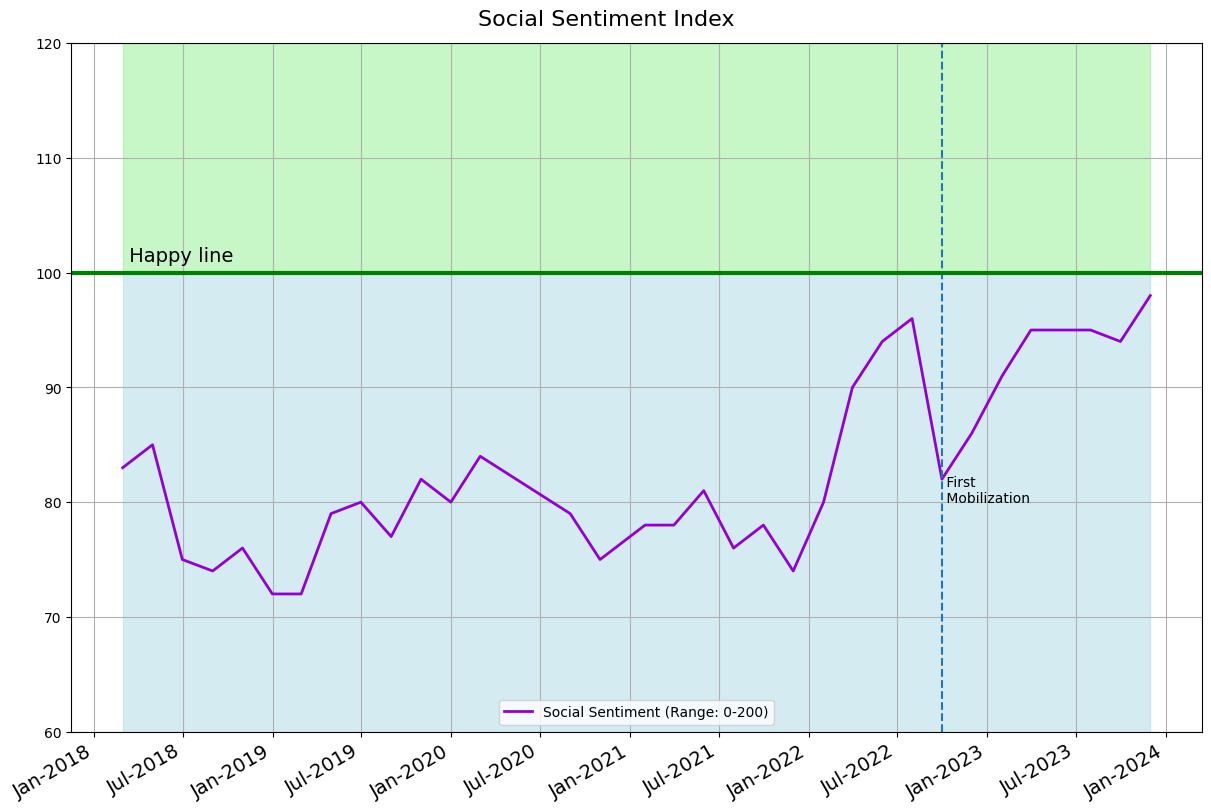

In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YEARLY, DateFormatter, rrulewrapper, RRuleLocator, drange)

fig, ax = plt.subplots(figsize=(12, 8), constrained_layout=True,)


plt.ylim(60,120)

ax.plot(ssi_2018.date, ssi_2018['Social Sentiment Index'], linewidth=2,color='darkviolet' )

ax.axvline(pd.Timestamp('2022-09-30'),linestyle='dashed', alpha=1)
ax.text(pd.Timestamp('2022-09-30'),y=80, s=' First \n Mobilization', horizontalalignment='left', color='black')

ax.axhline(y=100,linewidth=3, alpha=1, color='green')
ax.text(pd.Timestamp('2018-03-01'),y=101, s=' Happy line', horizontalalignment='left', color='black', size=14)

plt.fill_between(ssi_2018.date, 0, 100, color='lightblue', alpha=.5)
plt.fill_between(ssi_2018.date, 100, 120, color='lightgreen', alpha=.5)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%b-%Y"))
plt.setp(ax.get_xticklabels(), rotation=30, ha="right", size=14)
plt.grid()

ax.legend(['Social Sentiment (Range: 0-200)'], loc='lower center')

fig.suptitle('Social Sentiment Index', fontsize=16)


#plt.savefig(str(new_dir)+ '/social_sentiment_Index.jpg', bbox_inches='tight')

SSI METHODOLOGY:
All the questions used in calculating the SSI seek to bring out positive or negative perceptions (or a pattern of change in these perceptions) in order to sharpen the expressiveness of the indicator. The focus is on four elements:
respondents’ family current situation (sub index FI, 2 questions)
general economic and political situation in Russia (sub index RI, 3 questions)
Assessment of President and government (sub index PI, 2 questions)
Expectations for personal and country situation (sub index EI, 5 questions)
An individual index for each question is calculated as the difference between positive and negative answers, to which 100 is added to avoid negative values of the index. The aggregate SSI is calculated as the arithmetic mean of individual indices. Thus, the SSI varies in the range from 0 to 200, where values below 100 indicate the prevalence of negative appraisals among the public. (‘https://www.levada.ru/en/social-sentiment-index/)
